In [1]:
#%pylab inline
%matplotlib widget
%pylab
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, PathPatch
import fortran_reader as fr
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as ss
import scipy.signal as sig
from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle as Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
from random import seed
from random import random


Using matplotlib backend: module://ipympl.backend_nbagg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import pickle 
with open('systems.txt', 'rb') as handle:
    systems = pickle.loads(handle.read())

In [3]:
nsats = len(systems[30]['sat_pxs'])
print(nsats)

29


https://ocw.mit.edu/courses/aeronautics-and-astronautics/16-07-dynamics-fall-2009/lecture-notes/MIT16_07F09_Lec26.pdf

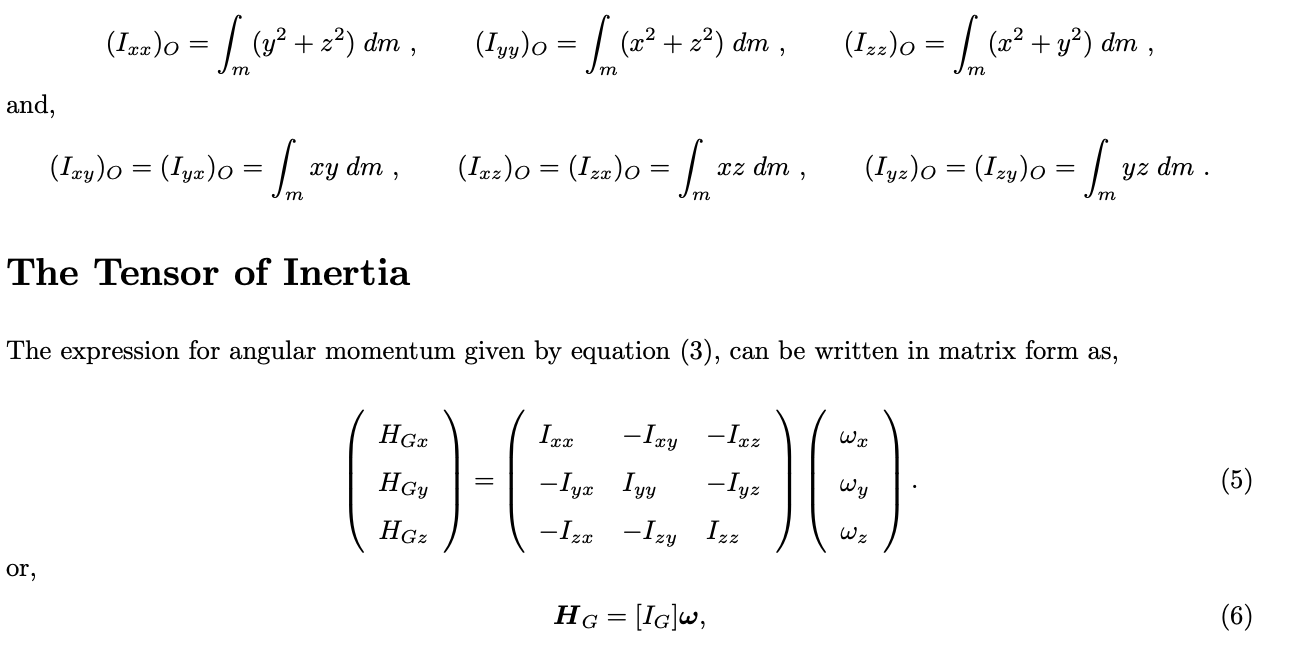

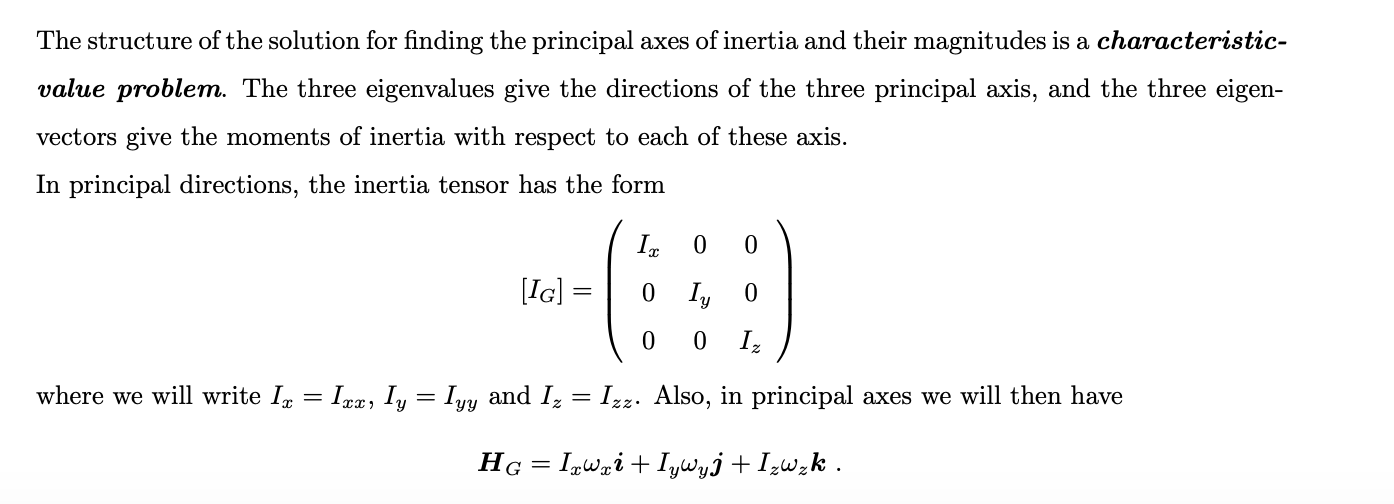

https://hepweb.ucsd.edu/ph110b/110b_notes/node26.html
*assume uniform density and pull the mass out

# Choose a System

In [4]:
syst = 30 #4 
print(systems[syst]['MW_rvir'])

[0.01865591]


## Project onto plane when frame of reference is spin of the central

In [5]:
# Creating histogram
#angles = np.asarray(angles)
nsats = len(systems[syst]['sat_pxs'])
fig, ax = plt.subplots(1, 1,
                        figsize =(8,5), 
                        tight_layout = True)

histbins = 25
  
ax.hist(np.abs(systems[syst]['cos']), density=False,bins =histbins,ec='purple',fc='thistle')
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
ax.set_xlim(0,1)
  
# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

### Find a normal vector to the plane with your wanted cos theta

In [6]:
costheta = 0.2
rsep_mask = np.where(((np.abs(systems[syst]['cos'])) > costheta) & ((np.abs(systems[syst]['cos'])) < costheta+0.1) ) 
sep_vectors = systems[syst]['r_sep'][rsep_mask]

for i in range(len(rsep_mask)):
    print('Cos',systems[syst]['cos'][rsep_mask])
    print('X', systems[syst]['sat_pxs'][rsep_mask])
    print('Y', systems[syst]['sat_pys'][rsep_mask])
    print('Z', systems[syst]['sat_pzs'][rsep_mask])
    #print('Sep',sep_vectors)

Cos [-0.20871972 -0.25048289 -0.25667277  0.26613365 -0.21343008 -0.28943914
  0.23643908  0.21833668 -0.22617851  0.23653461 -0.2397904   0.20202726
  0.24764184]
X [0.84235378 0.83914857 0.84187594 0.84948145 0.84390957 0.84215835
 0.84717118 0.84597053 0.84398576 0.84602035 0.845598   0.84543545
 0.84553776]
Y [0.06047826 0.05911128 0.05748942 0.04831133 0.0565895  0.05537538
 0.04989481 0.0497525  0.05253984 0.05040217 0.0529321  0.05214931
 0.05198527]
Z [1.57462619 1.56829145 1.57042269 1.57223388 1.57243672 1.56807781
 1.56985545 1.56806333 1.56782253 1.5687923  1.57055171 1.57052917
 1.57045603]


In [7]:
lx = systems[syst]['MW_px'][0]
ly = systems[syst]['MW_py'][0]
lz = systems[syst]['MW_pz'][0]
l = np.array([lx,ly,lz])
l_mag = np.linalg.norm(l)
norm_l = l/l_mag

ez = np.array([lx,ly,lz])

n_ez = ez/np.linalg.norm(ez)
print(ez,n_ez)
print(np.linalg.norm(l))


a = np.array([0.55099776,0.50366147,0.59533098])
b = np.array([0.55080371,0.50357871,0.59494747])
c = np.array([0.55096883,0.50348052,0.5950765])

ab = b - a
ac = c - a

print(shape(ab))
n = np.cross(ab,ac)

norm_n = n/np.linalg.norm(n)


x0 = systems[syst]['MW_px'][0]
y0 = systems[syst]['MW_py'][0]
z0 = systems[syst]['MW_pz'][0]

gal_center = np.array([x0,y0,z0])

d = np.dot(-gal_center,norm_n)


# create x,y

xx, yy = np.meshgrid(np.linspace(systems[syst]['halo_px']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_px']+systems[syst]['halo_rvir']*1e-1,100),
np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100))



# calculate corresponding z

#z = (-norm_n[0] * xx - norm_n[1] * yy - d) * 1. /norm_n[2]


# calculate corresponding z point-normal method
z = 


[0.84538694 0.05179458 1.56938716] [0.47404428 0.02904342 0.88002188]
1.7833501607587618
(3,)


In [8]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')






imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length=5e-3, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       norm_n[0],norm_n[1],norm_n[2],color='red', length=5e-3, normalize=True,label='Normal')
central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='gold',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")
#"""

#plot the plane
plane = ax.plot_surface(xx, yy, z,color='k' ,alpha=0.3)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
#ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Look at edge cases

In [ ]:
syst = 4 #4 

In [ ]:
print(systems[syst]['MW_rvir'])

In [ ]:
# Creating histogram
#angles = np.asarray(angles)
nsats = len(systems[syst]['sat_pxs'])
fig, ax = plt.subplots(1, 1,
                        figsize =(8,5), 
                        tight_layout = True)

histbins = 25
  
ax.hist(np.abs(systems[syst]['cos']), density=False,bins =histbins,ec='purple',fc='thistle')
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
ax.set_xlim(0,1)
  
# Show plot
plt.show()

### Find a normal vector to the plane with your wanted cos theta

In [ ]:
costheta = 0.0
rsep_mask = np.where(((np.abs(systems[syst]['cos'])) > costheta) & ((np.abs(systems[syst]['cos'])) < costheta+0.1) ) 
sep_vectors = systems[syst]['r_sep'][rsep_mask]

for i in range(len(rsep_mask)):
    print('Cos',systems[syst]['cos'][rsep_mask])
    print('X', systems[syst]['sat_pxs'][rsep_mask])
    print('Y', systems[syst]['sat_pys'][rsep_mask])
    print('Z', systems[syst]['sat_pzs'][rsep_mask])
    #print('Sep',sep_vectors)

In [ ]:
lx = systems[syst]['MW_px'][0]
ly = systems[syst]['MW_py'][0]
lz = systems[syst]['MW_pz'][0]
l = np.array([lx,ly,lz])
l_mag = np.linalg.norm(l)
norm_l = l/l_mag

ez = np.array([lx,ly,lz])

n_ez = ez/np.linalg.norm(ez)
print(ez,n_ez)
print(np.linalg.norm(l))


a = np.array([0.3916042,0.41817949,0.50799849])
b = np.array([0.39258224,0.41809721,0.50840926])
c = np.array([0.39175521,0.41449974,0.50573096])

ab = b - a
ac = c - a

n = np.cross(ab,ac)

norm_n = n/np.linalg.norm(n)


x0 = systems[syst]['MW_px'][0]
y0 = systems[syst]['MW_py'][0]
z0 = systems[syst]['MW_pz'][0]

gal_center = np.array([x0,y0,z0])

d = np.dot(-gal_center,norm_n)


# create x,y

xx, yy = np.meshgrid(np.linspace(systems[syst]['halo_px']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_px']+systems[syst]['halo_rvir']*1e-1,100),
np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100))



# calculate corresponding z

z = (-norm_n[0] * xx - norm_n[1] * yy - d) * 1. /norm_n[2]



In [ ]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c=systems[syst]['halo_level'],edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c=systems[syst]['sat_levels'],edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c=systems[syst]['MW_level'],edgecolors='darkblue',alpha=0.4,label='Central')

spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length=5e-2, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       norm_n[0],norm_n[1],norm_n[2],color='red', length=5e-2, normalize=True,label='Normal')


central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='gold',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")
#"""

#plot the plane
plane = ax.plot_surface(xx, yy, z,color='k' ,alpha=0.3)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

In [ ]:

fig,ax = plt.subplots(1,3,figsize=[8,5])
#plt.hist2d(xstars,ystars*np.cos(iz), bins=(200,200),norm=mpl.colors.LogNorm(),cmap='plasma')
ax[0].scatter(systems[syst]['halo_px'],systems[syst]['halo_py'],
                      s=systems[syst]['halo_rvir']*1e5,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[0].scatter(systems[syst]['MW_px'],systems[syst]['MW_py'],
                      s=systems[syst]['MW_rvir']*1e5,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[0].scatter(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],
                      s=systems[syst]['sat_rvirs']*1e5,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[0].set_title('X-Y Plane, Face-On')
ax[0].legend(loc='upper right',markerscale=0.3)



ax[1].scatter(systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e6,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[1].scatter(systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e6,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[1].scatter(systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[1].set_title('Y-Z Plane, Face-On')
ax[1].legend(loc='upper right',markerscale=0.3)



ax[2].scatter(systems[syst]['halo_px'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e6,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
ax[2].scatter(systems[syst]['MW_px'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e6,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
ax[2].scatter(systems[syst]['sat_pxs'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e6,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
ax[2].set_title('X-Z Plane, Face-On')
ax[2].legend(loc='upper right',markerscale=0.3)

plt.show()

### Misaligned System

In [58]:
syst = 52

In [59]:
# Creating histogram
#angles = np.asarray(angles)
nsats = len(systems[syst]['sat_pxs'])
fig, ax = plt.subplots(1, 1,
                        figsize =(8,5), 
                        tight_layout = True)

histbins = 25
  
ax.hist(np.abs(systems[syst]['cos']), density=False,bins =histbins,ec='purple',fc='thistle')
ax.set_title(f'Angular Distribution of {nsats} Satellites')
ax.set_xlabel(r'abs(Cos $\theta$)')
ax.set_xlim(0,1)
  
# Show plot
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [ ]:
costheta = 0.98
rsep_mask = np.where(((np.abs(systems[syst]['cos'])) > costheta) & ((np.abs(systems[syst]['cos'])) < costheta+0.1) ) 
sep_vectors = systems[syst]['r_sep'][rsep_mask]

for i in range(len(rsep_mask)):
    print('Cos',systems[syst]['cos'][rsep_mask])
    print('X', systems[syst]['sat_pxs'][rsep_mask])
    print('Y', systems[syst]['sat_pys'][rsep_mask])
    print('Z', systems[syst]['sat_pzs'][rsep_mask])
    #print('Sep',sep_vectors)

In [ ]:
lx = systems[syst]['MW_px'][0]
ly = systems[syst]['MW_py'][0]
lz = systems[syst]['MW_pz'][0]
l = np.array([lx,ly,lz])
l_mag = np.linalg.norm(l)
norm_l = l/l_mag

ez = np.array([lx,ly,lz])

n_ez = ez/np.linalg.norm(ez)
print(ez,n_ez)
print(np.linalg.norm(l))


a = np.array([0.21129475  ,0.32430295 ,0.34693827   ])
b = np.array([0.21142819,0.32416297  ,0.34699511])
c = np.array([0.21125731,0.32442874,0.3469689 ])

ab = b - a
ac = c - a

n = np.cross(ab,ac)

norm_n = n/np.linalg.norm(n)


x0 = systems[syst]['MW_px'][0]
y0 = systems[syst]['MW_py'][0]
z0 = systems[syst]['MW_pz'][0]

gal_center = np.array([x0,y0,z0])

d = np.dot(-gal_center,norm_n)


# create x,y

xx, yy = np.meshgrid(np.linspace(systems[syst]['halo_px']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_px']+systems[syst]['halo_rvir']*1e-1,100),
np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100))



# calculate corresponding z

z = (-norm_n[0] * xx - norm_n[1] * yy - d) * 1. /norm_n[2]



In [ ]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length=5e-2, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       norm_n[0],norm_n[1],norm_n[2],color='red', length=5e-2, normalize=True,label='Normal')

central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='gold',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")

#"""

#plot the plane
plane = ax.plot_surface(xx, yy, z,color='k' ,alpha=0.3)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

# Project a plane of arbitrary theta and phi onto a system

In [ ]:
## plane geometry (0.5,0) will set phi and theta to 0 
#random pulls a random float between 0-1 from a uniform dist

u1 = random() #[0,1]  
u2 = random() #[0,1]

print('random numbers',u1,u2)

theta = np.arccos(2*u1 - 1)  - ( np.pi/2) #makes sure cos_theta is bw -1,1
print('theta',theta/np.pi,'pi')

#cos_theta = 0 #[-1,-1]
#phi = 0.5 #[0,1]
phi = 2*np.pi*u2

print('phi',phi/np.pi ,'pi')

#sin_theta = np.sqrt(1-(cos_theta**2))




#print('cos_theta',np.cos(theta))
#print('sin_theta',np.sin(theta))





nx = np.cos(phi)*np.cos(theta)
ny = np.sin(phi)*np.cos(theta)
nz = np.sin(theta)
n = np.array([nx,ny,nz])
mag_n = np.linalg.norm(n)
print('magnitude of normal',mag_n)
unit_n = n/mag_n
print('unit_n',unit_n)
               
x0 = systems[syst]['MW_px'][0]
y0 = systems[syst]['MW_py'][0]
z0 = systems[syst]['MW_pz'][0]

gal_center = np.array([x0,y0,z0])

d = np.dot(-gal_center,unit_n)

# create x,y

"""if nz == 0:
    print('nz = 0')
    yy, zz = np.meshgrid(np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100),
    np.linspace(systems[syst]['halo_pz']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_pz']+systems[syst]['halo_rvir']*1e-1,100))
    
    # calculate corresponding z
    x = ((-unit_n[1] * yy) - (unit_n[2] * zz) - d) * 1. /unit_n[0]
    plane = x
    
    
else:
    """
xx, yy = np.meshgrid(np.linspace(systems[syst]['halo_px']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_px']+systems[syst]['halo_rvir']*1e-1,100),
np.linspace(systems[syst]['halo_py']-systems[syst]['halo_rvir']*1e-1,systems[syst]['halo_py']+systems[syst]['halo_rvir']*1e-1,100))


# calculate corresponding z
z = (-unit_n[0] * xx - unit_n[1] * yy - d) * 1. /unit_n[2]




#print('plane',z)



In [61]:
def get_plane(u1,u2,system):

    theta = np.arccos(2*u1 - 1)  - ( np.pi/2) #makes sure cos_theta is bw -1,1
    phi = 2*np.pi*u2

    nx = np.cos(phi)*np.cos(theta)
    ny = np.sin(phi)*np.cos(theta)
    nz = np.sin(theta)
    n = np.array([nx,ny,nz])
    mag_n = np.linalg.norm(n)
    unit_n = n/mag_n

    x0 = systems[system]['MW_px'][0]
    y0 = systems[system]['MW_py'][0]
    z0 = systems[system]['MW_pz'][0]

    gal_center = np.array([x0,y0,z0])

    d = np.dot(-gal_center,unit_n)


    xx, yy = np.meshgrid(np.linspace(systems[system]['halo_px']-systems[system]['halo_rvir']*1e-1,systems[system]['halo_px']+systems[system]['halo_rvir']*1e-1,100),
    np.linspace(systems[system]['halo_py']-systems[system]['halo_rvir']*1e-1,systems[system]['halo_py']+systems[system]['halo_rvir']*1e-1,100))


    # calculate corresponding z
    z = (-unit_n[0] * xx - unit_n[1] * yy - d) * 1. /unit_n[2]
    
    return z,xx,yy,unit_n








In [62]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length= 5e-2, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       unit_n[0],unit_n[1],unit_n[2],color='red', length=5e-2, normalize=True,label='Normal')
#"""

#plot the plane
plane = ax.plot_surface(xx,yy, z,color='k' ,alpha=0.4)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [63]:
def dist(x,y,z,normal_vect,d):
    """
    distance between a point and a plane defined by a normal vector 
    
    """
    nx, ny, nz = normal_vect[0],normal_vect[1],normal_vect[2]
    num = np.abs(nx*x + ny*y + nz*z + d)
    den = np.linalg.norm(normal_vect)
    
    dist = num/den
    
    return dist
    

In [64]:
def best_plane(system,n=10):
    
 
    niter = n

    plane_finder = {}
    plane_finder['u1'] = []
    plane_finder['u2'] = []
    plane_finder['delta_s'] =[]
    plane_finder['rms_dist'] = []

    for i in range(niter):


        u1 = random() #[0,1]  
        u2 = random() #[0,1]

        plane_finder['u1'].append(u1)
        plane_finder['u2'].append(u2)



        theta = np.arccos(2*u1 - 1)  - ( np.pi/2) #makes sure cos_theta is bw -1,1



        phi = 2*np.pi*u2




        nx = np.cos(phi)*np.cos(theta)
        ny = np.sin(phi)*np.cos(theta)
        nz = np.sin(theta)
        n = np.array([nx,ny,nz])
        mag_n = np.linalg.norm(n)
        unit_n = n/mag_n


        x0 = systems[system]['MW_px'][0]
        y0 = systems[system]['MW_py'][0]
        z0 = systems[system]['MW_pz'][0]

        gal_center = np.array([x0,y0,z0])

        d = np.dot(-gal_center,unit_n)

        #equation of plane (Ax + By + Cz + D = 0): unit_n[0] * x + unit_n[1] * y  + unit_n[2]*z + d = 0 

        #calculate distances

        distances = []


        for k in range(len(systems[system]['sat_pxs'])):
            x,y,z = systems[system]['sat_pxs'][k],systems[system]['sat_pys'][k],systems[system]['sat_pzs'][k]
            s = dist(x,y,z,unit_n,d)
            distances.append(s)

        rms = np.mean(np.asarray(distances)**2)
        rms = np.sqrt(rms)
        plane_finder['delta_s'].append(distances)
        plane_finder['rms_dist'].append(rms)
        
    #find minimum rms and corresponding u1, u2 

    u1_a = np.asarray(plane_finder['u1'])
    #print(len(u1_a))
    u2_a = np.asarray(plane_finder['u2'])
    rms_a = np.asarray(plane_finder['rms_dist'])
    #print(rms_a)

    best_plane = np.argmin(rms_a)
    #print('best plane',best_plane)
        
    print('Best plane has:')
    print('Theta:', np.arccos(2*u1_a[best_plane] - 1)  - ( np.pi/2))
    print('Phi:', 2*np.pi*u2_a[best_plane])
    print(f'u1 = {u1_a[best_plane]}; u2 = {u2_a[best_plane]}')
        
        
        



In [65]:
best_plane(system=52)

Best plane has:
Theta: 0.5068562338528184
Phi: 5.748092869184893
u1 = 0.2572844328133077; u2 = 0.914837393482051


In [68]:
z_best,xx,yy,unit_n = get_plane(u1=0.2572844328133077,u2=0.914837393482051,system=52)

In [69]:
syst = 52
fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length= 5e-2, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       unit_n[0],unit_n[1],unit_n[2],color='red', length=5e-2, normalize=True,label='Normal')
central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='gold',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")

#plot the plane
plane = ax.plot_surface(xx,yy, z_best,color='k' ,alpha=0.4)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Try the plane finder on a system with a well defined plane

In [54]:
syst=30

In [55]:
best_plane(system=30,n=500)

Best plane has:
Theta: -0.6694662550189463
Phi: 0.7530041801001248
u1 = 0.8102837688609132; u2 = 0.11984433743179468


In [56]:
z_best,unit_n = get_plane(u1=0.7307848587068342,u2=0.13163525985395041,system=30)

In [57]:

fig = plt.figure(figsize=[8,8])
ax = plt.axes(projection='3d')


imhalo = ax.scatter3D(systems[syst]['halo_px'],systems[syst]['halo_py'],systems[syst]['halo_pz'],
                      s=systems[syst]['halo_rvir']*1e4,c='cornflowerblue',edgecolors='royalblue',alpha=0.4,label='MW type DM Halo')
imsats = ax.scatter3D(systems[syst]['sat_pxs'],systems[syst]['sat_pys'],systems[syst]['sat_pzs'],
                      s=systems[syst]['sat_rvirs']*1e4,c='rosybrown',edgecolors='indianred',alpha=0.4,label='Satellites')
imcentral = ax.scatter3D(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                      s=systems[syst]['MW_rvir']*1e4,c='slateblue',edgecolors='darkblue',alpha=0.4,label='Central')
spin = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       systems[syst]['MW_lx'],systems[syst]['MW_ly'],systems[syst]['MW_lz'],color='black', length= 3e-2, normalize=True,label='Spin')
normal = ax.quiver(systems[syst]['MW_px'],systems[syst]['MW_py'],systems[syst]['MW_pz'],
                       unit_n[0],unit_n[1],unit_n[2],color='red', length=3e-2, normalize=True,label='Normal')
central = Circle((systems[syst]['MW_px'], systems[syst]['MW_py']), radius=systems[syst]['MW_rvir'],color='gold',alpha=0.4,label='Rvir of MW')
ax.add_patch(central)
art3d.pathpatch_2d_to_3d(central, systems[syst]['MW_pz'], zdir="z")

#plot the plane
plane = ax.plot_surface(xx,yy, z_best,color='k' ,alpha=0.4)



ax.set_title('MW type Halo System, scaled by Virial Radius of Objects')
ax.autoscale('False')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.legend(loc="upper right", markerscale=.05)
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …